In [1]:
import os
import matplotlib
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
DOE_NAME = "doe5"
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
response = "FIT"

In [3]:
df_res = pd.read_csv(DOE_NAME + "_res.csv")  # doe1_res.csv

In [4]:
df_res.sort_values(by=response, inplace=True, ascending=False)
df_res["RMSE"] = df_res["RMSE"].fillna(1000)
df_res["FIT"] = df_res["FIT"] * (df_res["FIT"] > 0) # minimum fit to 0% (easier to interpret)
df_res["FIT"] = df_res["FIT"].fillna(0.0)
#df_res["FIT"] = df_res["FIT"].fillna(np.min(df_res["FIT"])-0.1)

In [5]:
for factor in factors:
    df_res[factor] = df_res[factor].astype("category")

Best model LSTM, followed by RAND and ZERO. You can get high performance without an estimator!

In [6]:
df_res.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
26,113,0.001,10000,3600,128,80,40,forward,LSTM,15,187,98.967903,2.468226
409,692,0.001,10000,3600,512,80,40,forward,RAND,15,324,98.893478,2.646225
162,536,0.001,10000,3600,512,40,80,forward,ZERO,15,176,98.874252,2.692188
685,677,0.001,10000,3600,128,40,40,forward,RAND,15,95,98.823860,2.812717
24,743,0.001,10000,3600,1024,80,80,forward,RAND,15,537,98.818459,2.825626
103,173,0.001,10000,3600,128,160,80,forward,LSTM,15,739,98.781624,2.913701
99,353,0.001,10000,3600,128,80,80,forward,FF,15,731,98.755615,2.975917
682,272,0.001,10000,3600,512,160,20,forward,FF,15,104,98.690544,3.131527
347,362,0.001,10000,3600,32,160,80,forward,FF,15,20,98.687134,3.139684
32,53,0.001,10000,3600,128,40,20,forward,LSTM,15,756,98.685600,3.143355


Worst models all related to short training

In [7]:
df_res.tail(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
332,39,0.001,10000,300,128,320,10,forward,LSTM,15,40,89.375107,25.409145
114,93,0.001,10000,300,1024,320,20,forward,LSTM,15,50,89.281738,25.632439
616,183,0.001,10000,300,128,320,80,forward,LSTM,15,45,89.254318,25.697999
252,153,0.001,10000,300,1024,40,80,forward,LSTM,15,380,89.174286,25.889415
410,756,0.001,10000,300,32,320,80,forward,RAND,15,599,89.151314,25.944343
414,186,0.001,10000,300,512,320,80,forward,LSTM,15,78,88.607635,27.244540
181,522,0.001,10000,300,512,320,40,forward,ZERO,15,322,88.538139,27.410721
370,567,0.001,10000,300,128,320,80,forward,ZERO,15,547,88.510361,27.477149
160,333,0.001,10000,300,1024,320,40,forward,FF,15,346,88.433067,27.662007
157,120,0.001,10000,300,32,160,40,forward,LSTM,15,725,88.398041,27.745780


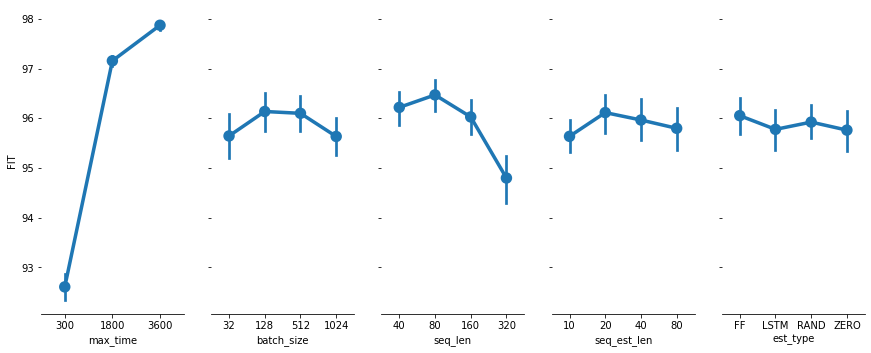

In [42]:
# Full results: main effects
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

# Biggest effect seems to be max_time

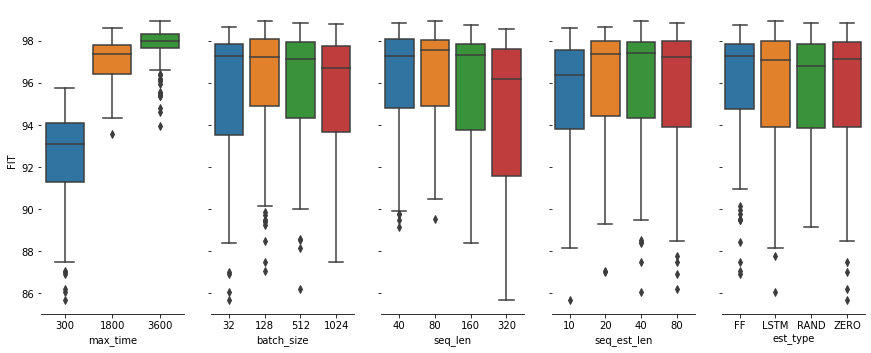

In [9]:
# Full results: box plots
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
#g.set(ylim=(85, 100))
sns.despine(fig=g.fig, left=True)

Biggest effect seems to be max_time. Too long seq_len (320 seem to have a negative effect). Too short seq_est_len (10) seem to have a negative effect

In [32]:
fig = px.scatter(df_res, y="FIT",
                 facet_col="max_time", facet_row="seq_est_len", color="seq_len",
                 hover_data=["max_time", "seq_est_len"])
fig.show()

* too long seq_len is particularly critical for the shortest training time (last column, violet points)
* too short seq_est_len (last row) also has a detrimental effect, also with long training

In [34]:
df_res.groupby(["max_time", "seq_len"])[["FIT"]].mean()

FIT
max_time seq_len           
300      40       93.597980
         80       93.762545
         160      92.906291
         320      90.158101
1800     40       97.302886
         80       97.607897
         160      97.179709
         320      96.534849
3600     40       97.756505
         80       98.040119
         160      97.995001
         320      97.699773

Particularly interesting case: short estimation sequence, long training time, bad performance. This could be linked to estimator!

In [36]:
df_short_est = df_res[(df_res["seq_est_len"] == 10) & (df_res["max_time"] == 3600)]
df_short_est.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
303,23,0.001,10000,3600,1024,80,10,forward,LSTM,15,352,98.647896,3.233535
695,209,0.001,10000,3600,128,80,10,forward,FF,15,465,98.624115,3.290384
278,218,0.001,10000,3600,32,160,10,forward,FF,15,294,98.614952,3.312312
186,17,0.001,10000,3600,128,80,10,forward,LSTM,15,55,98.603325,3.340106
180,5,0.001,10000,3600,128,40,10,forward,LSTM,15,103,98.602142,3.342936
401,221,0.001,10000,3600,128,160,10,forward,FF,15,367,98.570923,3.417603
362,29,0.001,10000,3600,128,160,10,forward,LSTM,15,496,98.542755,3.484965
717,197,0.001,10000,3600,128,40,10,forward,FF,15,144,98.506874,3.570766
677,200,0.001,10000,3600,512,40,10,forward,FF,15,609,98.407684,3.807976
418,8,0.001,10000,3600,512,40,10,forward,LSTM,15,395,98.402679,3.819947


In [37]:
df_short_est.tail(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
608,11,0.001,10000,3600,1024,40,10,forward,LSTM,15,546,97.145874,6.825570
514,44,0.001,10000,3600,512,320,10,forward,LSTM,15,8,97.138855,6.842356
7,398,0.001,10000,3600,32,80,10,forward,ZERO,15,435,97.038292,7.082847
318,47,0.001,10000,3600,1024,320,10,forward,LSTM,15,419,96.922333,7.360164
110,407,0.001,10000,3600,1024,80,10,forward,ZERO,15,38,96.908188,7.393983
556,593,0.001,10000,3600,128,80,10,forward,RAND,15,552,96.848366,7.537059
450,401,0.001,10000,3600,128,80,10,forward,ZERO,15,458,96.774780,7.713030
754,596,0.001,10000,3600,512,80,10,forward,RAND,15,591,96.670868,7.961529
171,233,0.001,10000,3600,128,320,10,forward,FF,15,764,96.642151,8.030191
651,599,0.001,10000,3600,1024,80,10,forward,RAND,15,287,96.429100,8.539703


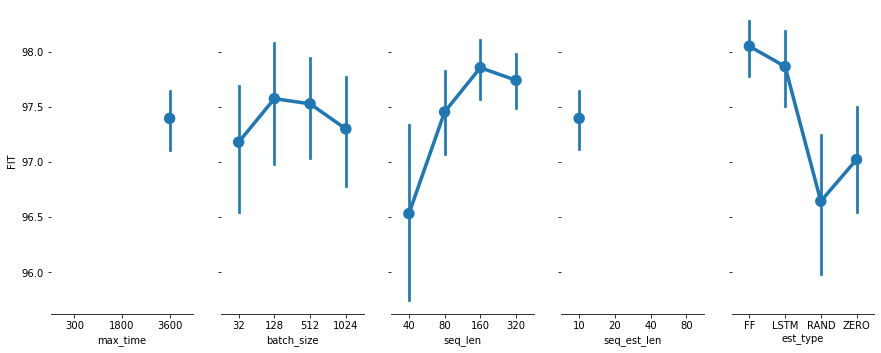

In [38]:
# Full results: main effects
g = sns.PairGrid(df_short_est, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

# Biggest effect seems to be max_time

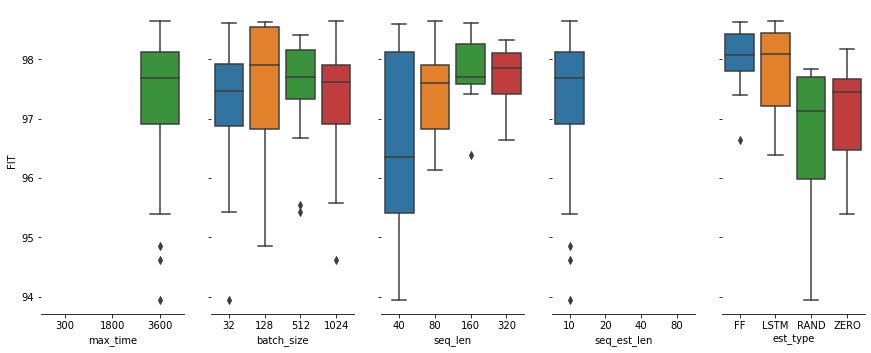

In [40]:
# Full results: box plots
g = sns.PairGrid(df_short_est, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
#g.set(ylim=(85, 100))
sns.despine(fig=g.fig, left=True)

Here indeed there is an estimator effect! Short training sequences also seem to have a negative effect!

The estimator effect is only visible with short estimation sequences

In [50]:
fig = px.scatter(df_short_est, y="FIT",
                 facet_col="est_type", facet_row="seq_len",#, color="seq_len",
                 hover_data=["max_time", "seq_est_len"])
fig.show()

In [47]:
df_short_est.groupby(["seq_len", "est_type"])[["FIT"]].median()

FIT
seq_len est_type           
40      FF        98.214428
        LSTM      97.823528
        RAND      94.734894
        ZERO      95.429344
80      FF        97.947201
        LSTM      98.190994
        RAND      96.549984
        ZERO      96.973240
160     FF        98.312340
        LSTM      98.268314
        RAND      97.691292
        ZERO      97.582104
320     FF        98.214142
        LSTM      97.592831
        RAND      97.752369
        ZERO      97.933491